In [30]:
!pip install lxml
!pip install html5lib
!pip install beautifulsoup4
!pip install panda
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
url ="https://www.nirfindia.org/Rankings/2024/EngineeringRanking.html"
df=pd.read_html(url)
df =tables[0]
df
tables[1]

,TLR (100),RPC (100),GO (100),OI (100),PERCEPTION (100)
0,95.79,93.1,81.07,65.85,100.0


In [ ]:
df[0].head()

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,89.46,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,86.66,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,83.09,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,82.79,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,76.88,5
5,IR-E-U-0560,Indian Institute of Technology RoorkeeMore Det...,Roorkee,Uttarakhand,76.00,6
6,IR-E-U-0053,Indian Institute of Technology GuwahatiMore De...,Guwahati,Assam,71.86,7
7,IR-E-U-0013,Indian Institute of Technology HyderabadMore D...,Hyderabad,Telangana,71.55,8
8,IR-E-U-0467,National Institute of Technology Tiruchirappal...,Tiruchirappalli,Tamil Nadu,66.88,9


In [23]:
import pandas as pd

# Fetch the data from the URL
url = "https://www.nirfindia.org/Rankings/2024/EngineeringRanking.html"
tables = pd.read_html(url)

# Extract the first table (assuming rankings are in the first table)
df = tables[0]

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,89.46,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,86.66,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,83.09,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,82.79,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,76.88,5


In [24]:
# Rename columns for better readability
column_renames = {
    "Name": "Institute",
    "TLR": "Teaching & Resources (TLR)",
    "RP": "Research & Practice (RP)",
    "GO": "Graduation Outcomes (GO)",
    "OI": "Outreach & Inclusivity (OI)",
    "PR": "Perception (PR)",
    "Score": "Overall Score"
}
df = df.rename(columns=column_renames)

# Remove unnecessary columns (if any)
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Display cleaned data
print("\nCleaned Data:")
display(df.head())



Cleaned Data:


,Institute ID,Institute,City,State,Overall Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,89.46,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,86.66,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,83.09,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,82.79,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,76.88,5


In [25]:
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Overall Score,Rank
count,100.000000,100.000000
mean,55.787900,50.490000
std,9.809328,29.006615
min,43.950000,1.000000
25%,48.302500,25.750000
50%,53.645000,50.500000
75%,61.025000,75.250000
max,89.460000,100.000000


In [26]:
top_10 = df.sort_values("Overall Score", ascending=False).head(10)
print("\nTop 10 Engineering Institutes in India (2024):")
display(top_10[["Rank", "Institute", "Overall Score"]])


Top 10 Engineering Institutes in India (2024):


,Rank,Institute,Overall Score
0,1,Indian Institute of Technology MadrasMore Deta...,89.46
1,2,Indian Institute of Technology DelhiMore Detai...,86.66
2,3,Indian Institute of Technology BombayMore Deta...,83.09
3,4,Indian Institute of Technology KanpurMore Deta...,82.79
4,5,Indian Institute of Technology KharagpurMore D...,76.88
5,6,Indian Institute of Technology RoorkeeMore Det...,76.00
6,7,Indian Institute of Technology GuwahatiMore De...,71.86
7,8,Indian Institute of Technology HyderabadMore D...,71.55
8,9,National Institute of Technology Tiruchirappal...,66.88
9,10,Indian Institute of Technology (Banaras Hindu ...,66.69


In [27]:
state_counts = df["State"].value_counts()
print("\nNumber of Top-ranked Institutes per State:")
display(state_counts.head(10))


Number of Top-ranked Institutes per State:


State
Tamil Nadu        14
Karnataka          9
Uttar Pradesh      8
Punjab             7
Delhi              7
Telangana          6
Rajasthan          5
Odisha             5
Maharashtra        5
Andhra Pradesh     4
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.
C:\Users\utkar\AppData\Local\Temp\ipykernel_6312\4053886689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="Overall Score", y="Institute", palette="viridis")


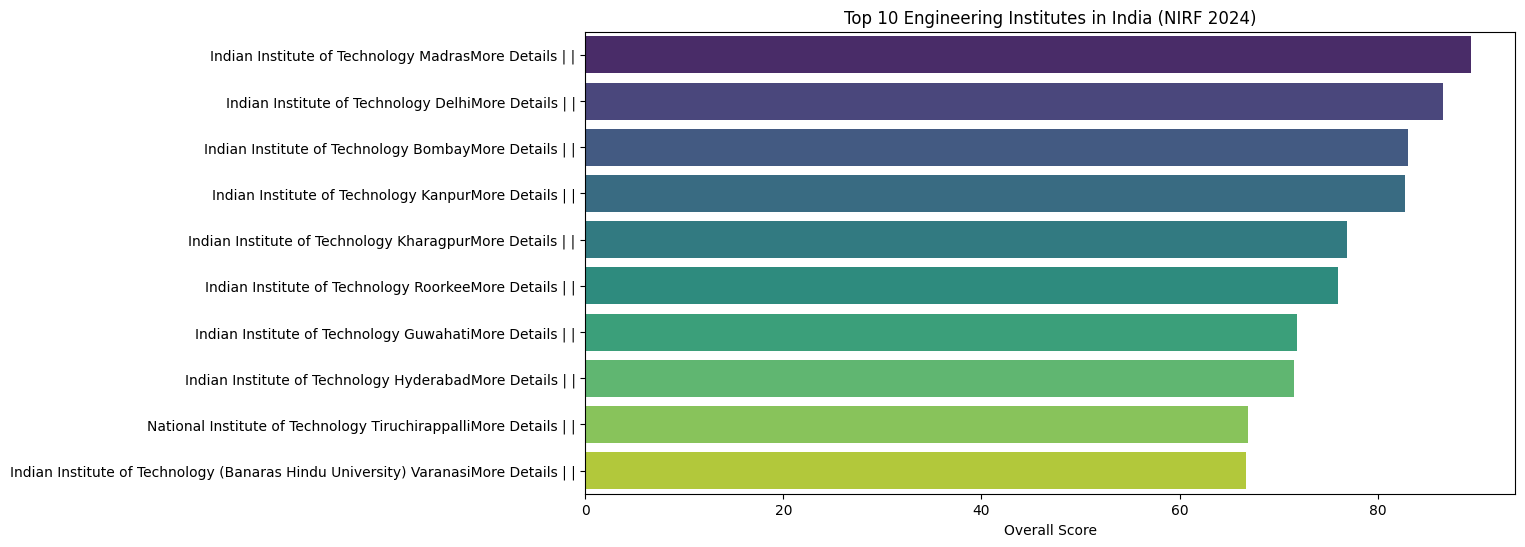

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x="Overall Score", y="Institute", palette="viridis")
plt.title("Top 10 Engineering Institutes in India (NIRF 2024)")
plt.xlabel("Overall Score")
plt.ylabel("")
plt.show()

In [77]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import os
from urllib.request import urlopen
import ssl

def scrape_engineering_rankings():
    # Bypass SSL verification
    ssl._create_default_https_context = ssl._create_unverified_context
    
    url = "https://www.nirfindia.org/Rankings/2024/EngineeringRanking.html"
    
    # Read all tables from the webpage
    tables = pd.read_html(url)
    
    # Find the main ranking table (identified by specific columns)
    for i, table in enumerate(tables):
        if 'Name' in table.columns and 'Score' in table.columns:
            print(f"Found ranking table at position {i}")
            return table
    
    # Fallback: Manual selection if automatic detection fails
    return tables[1]  # Usually the second table is the main ranking

def save_data(df):
    os.makedirs('../data', exist_ok=True)
    df.to_csv('../data/nirf_engineering_2024.csv', index=False)
    print("Data saved to ../data/nirf_engineering_2024.csv")

def clean_data(df):
    # Clean column names
    df.columns = [col.replace('\n', ' ').strip() for col in df.columns]
    
    # Convert scores to numeric
    if 'Score' in df.columns:
        df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    
    return df

if __name__ == "__main__":
    print("Scraping NIRF 2024 Engineering Rankings...")
    df = scrape_engineering_rankings()
    df = clean_data(df)
    save_data(df)
    print("\nSample data:")
    print(df.head())

  

Scraping NIRF 2024 Engineering Rankings...
Found ranking table at position 0
Data saved to ../data/nirf_engineering_2024.csv

Sample data:
  Institute ID                                               Name       City  \
0  IR-E-U-0456  Indian Institute of Technology MadrasMore Deta...    Chennai   
1  IR-E-I-1074  Indian Institute of Technology DelhiMore Detai...  New Delhi   
2  IR-E-U-0306  Indian Institute of Technology BombayMore Deta...     Mumbai   
3  IR-E-I-1075  Indian Institute of Technology KanpurMore Deta...     Kanpur   
4  IR-E-U-0573  Indian Institute of Technology KharagpurMore D...  Kharagpur   

           State  Score  Rank  
0     Tamil Nadu  89.46     1  
1          Delhi  86.66     2  
2    Maharashtra  83.09     3  
3  Uttar Pradesh  82.79     4  
4    West Bengal  76.88     5  


,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,89.46,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,86.66,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,83.09,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,82.79,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,76.88,5
...,...,...,...,...,...,...
95,IR-E-C-30045,"C.V. Raman Global University, OdishaMore Detai...",Bhubaneswar,Odisha,44.55,96
96,IR-E-U-0621,National Institute of Technology PuducherryMor...,Karaikal,Pondicherry,44.38,97
97,IR-E-C-19754,SR UniversityMore Details | |,Warangal,Telangana,44.29,98
98,IR-E-C-1269,R.V. College of EngineeringMore Details | |,Bengaluru,Karnataka,44.26,99


In [81]:
df

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,89.46,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,86.66,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,83.09,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,82.79,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,76.88,5
...,...,...,...,...,...,...
95,IR-E-C-30045,"C.V. Raman Global University, OdishaMore Detai...",Bhubaneswar,Odisha,44.55,96
96,IR-E-U-0621,National Institute of Technology PuducherryMor...,Karaikal,Pondicherry,44.38,97
97,IR-E-C-19754,SR UniversityMore Details | |,Warangal,Telangana,44.29,98
98,IR-E-C-1269,R.V. College of EngineeringMore Details | |,Bengaluru,Karnataka,44.26,99



=== Data Overview ===
Total Institutions: 100
States Represented: 25
Average Score: 55.79

=== Top 10 Institutions ===
                                                Name             City  \
0  Indian Institute of Technology MadrasMore Deta...          Chennai   
1  Indian Institute of Technology DelhiMore Detai...        New Delhi   
2  Indian Institute of Technology BombayMore Deta...           Mumbai   
3  Indian Institute of Technology KanpurMore Deta...           Kanpur   
4  Indian Institute of Technology KharagpurMore D...        Kharagpur   
5  Indian Institute of Technology RoorkeeMore Det...          Roorkee   
6  Indian Institute of Technology GuwahatiMore De...         Guwahati   
7  Indian Institute of Technology HyderabadMore D...        Hyderabad   
8  National Institute of Technology Tiruchirappal...  Tiruchirappalli   
9  Indian Institute of Technology (Banaras Hindu ...         Varanasi   

           State  Score  
0     Tamil Nadu  89.46  
1          Delhi  86.66 

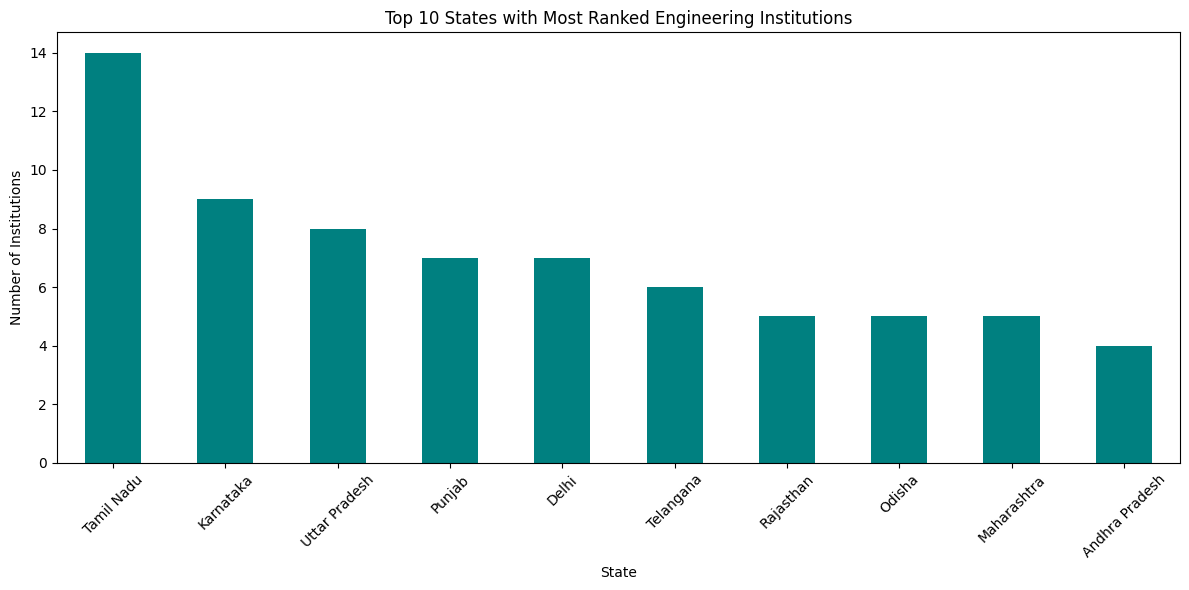

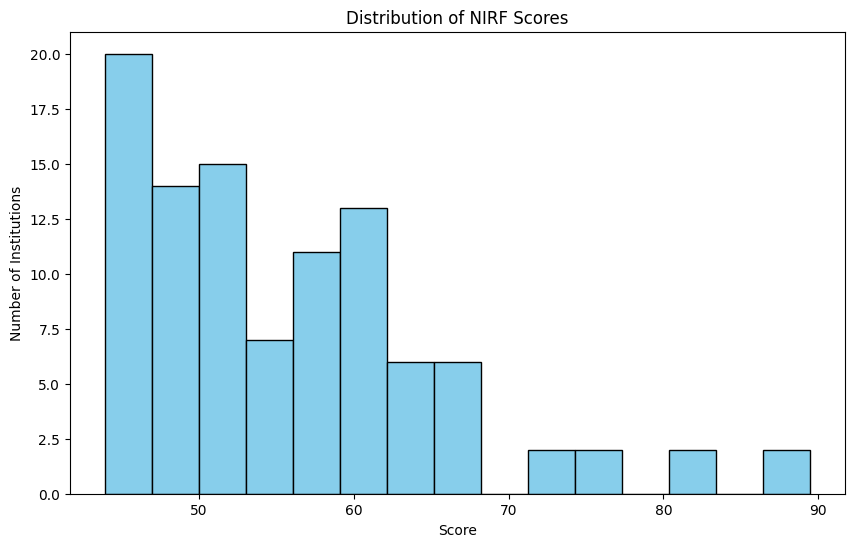

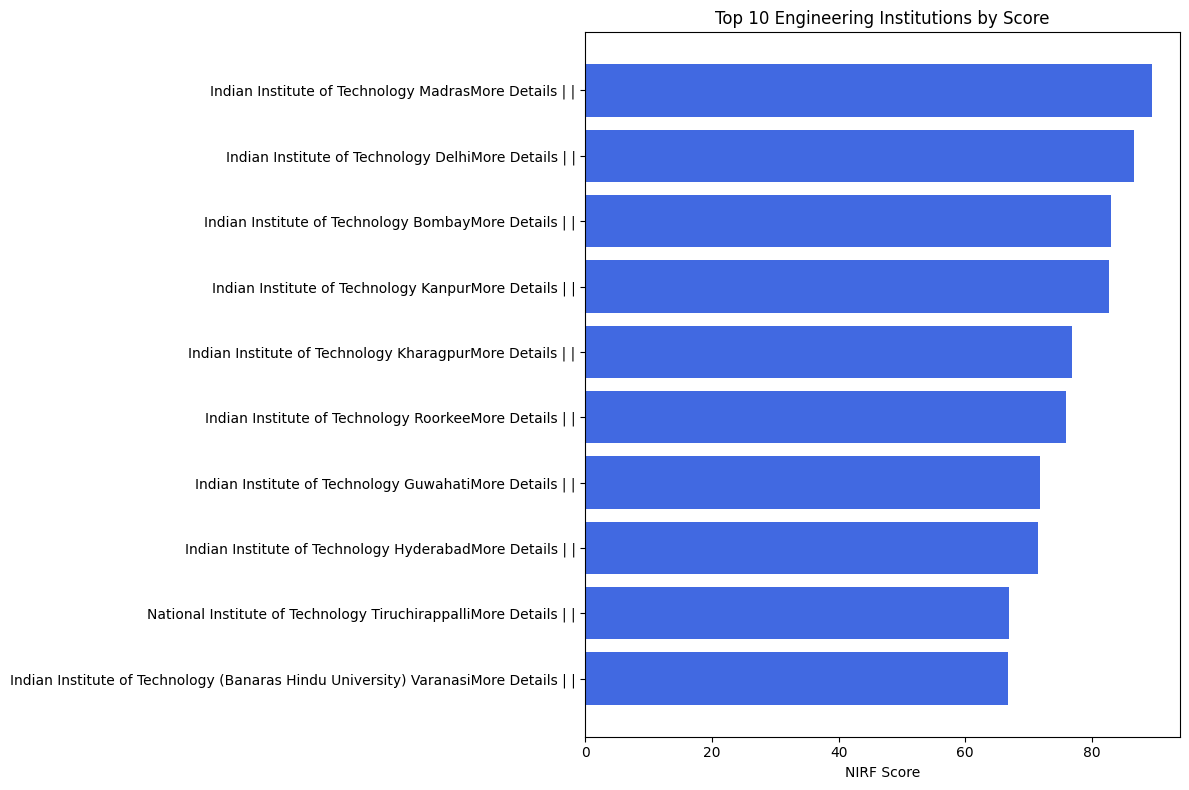

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_data():
    return pd.read_csv('../data/nirf_engineering_2024.csv')

def analyze_data(df):
    # Basic stats
    print("\n=== Data Overview ===")
    print(f"Total Institutions: {len(df)}")
    print(f"States Represented: {df['State'].nunique()}")
    print(f"Average Score: {df['Score'].mean():.2f}")
    
    # Top institutions
    top_10 = df.head(10)[['Name', 'City', 'State', 'Score']]
    print("\n=== Top 10 Institutions ===")
    print(top_10)
    
    # State analysis
    state_counts = df['State'].value_counts().head(10)
    print("\n=== Top 10 States by Institution Count ===")
    print(state_counts)
    
    return top_10, state_counts

def generate_visualizations(df, top_10, state_counts):
    os.makedirs('../plots', exist_ok=True)
    
    # Plot 1: Top states
    plt.figure(figsize=(12, 6))
    state_counts.plot(kind='bar', color='teal')
    plt.title('Top 10 States with Most Ranked Engineering Institutions')
    plt.ylabel('Number of Institutions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../plots/top_states.png')
    
    # Plot 2: Score distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['Score'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Distribution of NIRF Scores')
    plt.xlabel('Score')
    plt.ylabel('Number of Institutions')
    plt.savefig('../plots/score_distribution.png')
    
    # Plot 3: Top institutions
    plt.figure(figsize=(12, 8))
    plt.barh(top_10['Name'], top_10['Score'], color='royalblue')
    plt.title('Top 10 Engineering Institutions by Score')
    plt.xlabel('NIRF Score')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../plots/top_institutions.png')
    
    print("\nVisualizations saved to ../plots/")

if __name__ == "__main__":
    df = load_data()
    top_10, state_counts = analyze_data(df)
    generate_visualizations(df, top_10, state_counts)
    print("\nAnalysis complete!")


=== Data Overview ===
Total Institutions: 100
States Represented: 25
Average Score: 55.79

=== Top 10 Institutions ===
                                                Name             City  \
0  Indian Institute of Technology MadrasMore Deta...          Chennai   
1  Indian Institute of Technology DelhiMore Detai...        New Delhi   
2  Indian Institute of Technology BombayMore Deta...           Mumbai   
3  Indian Institute of Technology KanpurMore Deta...           Kanpur   
4  Indian Institute of Technology KharagpurMore D...        Kharagpur   
5  Indian Institute of Technology RoorkeeMore Det...          Roorkee   
6  Indian Institute of Technology GuwahatiMore De...         Guwahati   
7  Indian Institute of Technology HyderabadMore D...        Hyderabad   
8  National Institute of Technology Tiruchirappal...  Tiruchirappalli   
9  Indian Institute of Technology (Banaras Hindu ...         Varanasi   

           State  Score  
0     Tamil Nadu  89.46  
1          Delhi  86.66 

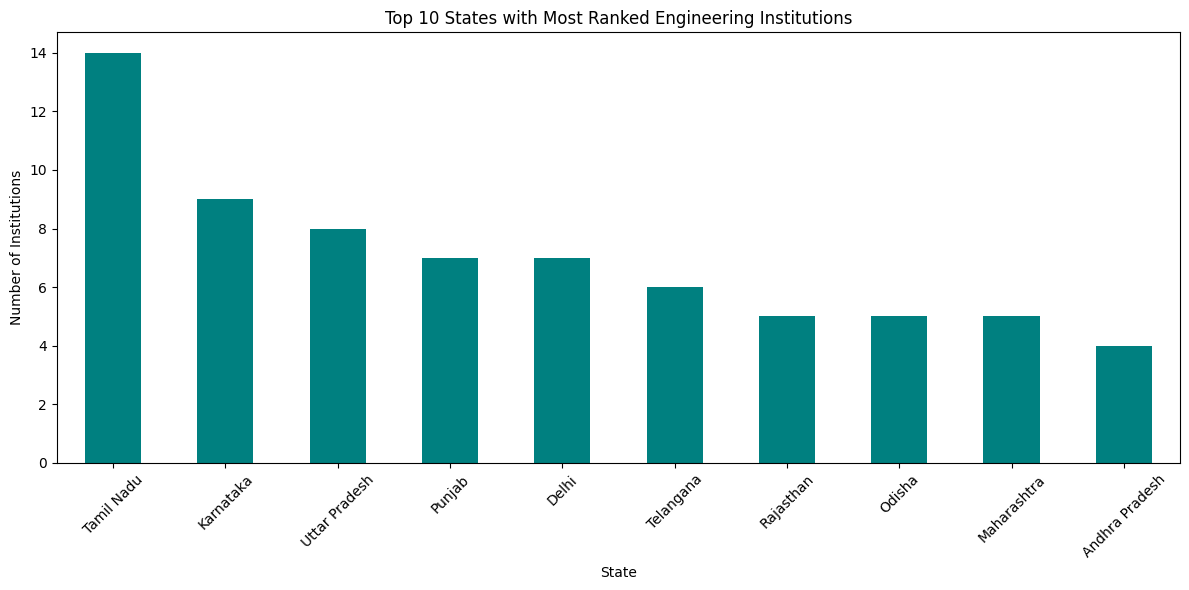

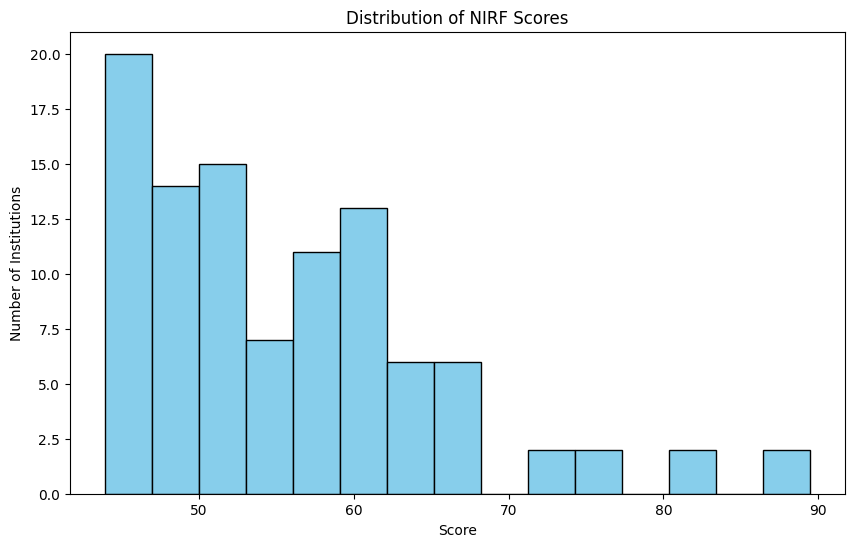

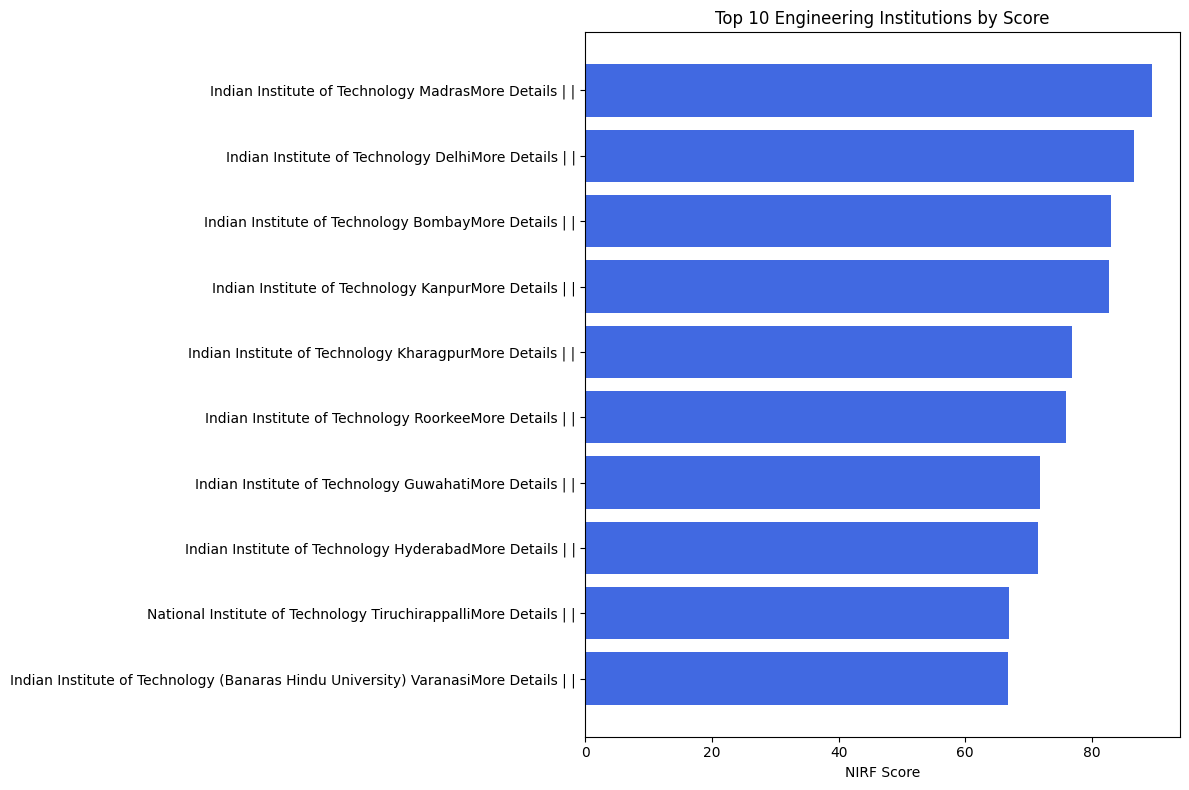

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_data():
    return pd.read_csv('../data/nirf_engineering_2024.csv')

def analyze_data(df):
    # Basic stats
    print("\n=== Data Overview ===")
    print(f"Total Institutions: {len(df)}")
    print(f"States Represented: {df['State'].nunique()}")
    print(f"Average Score: {df['Score'].mean():.2f}")
    
    # Top institutions
    top_10 = df.head(10)[['Name', 'City', 'State', 'Score']]
    print("\n=== Top 10 Institutions ===")
    print(top_10)
    
    # State analysis
    state_counts = df['State'].value_counts().head(10)
    print("\n=== Top 10 States by Institution Count ===")
    print(state_counts)
    
    return top_10, state_counts

def generate_visualizations(df, top_10, state_counts):
    os.makedirs('../plots', exist_ok=True)
    
    # Plot 1: Top states
    plt.figure(figsize=(12, 6))
    state_counts.plot(kind='bar', color='teal')
    plt.title('Top 10 States with Most Ranked Engineering Institutions')
    plt.ylabel('Number of Institutions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../plots/top_states.png')
    
    # Plot 2: Score distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['Score'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Distribution of NIRF Scores')
    plt.xlabel('Score')
    plt.ylabel('Number of Institutions')
    plt.savefig('../plots/score_distribution.png')
    
    # Plot 3: Top institutions
    plt.figure(figsize=(12, 8))
    plt.barh(top_10['Name'], top_10['Score'], color='royalblue')
    plt.title('Top 10 Engineering Institutions by Score')
    plt.xlabel('NIRF Score')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../plots/top_institutions.png')
    
    print("\nVisualizations saved to ../plots/")

if __name__ == "__main__":
    df = load_data()
    top_10, state_counts = analyze_data(df)
    generate_visualizations(df, top_10, state_counts)
    print("\nAnalysis complete!")

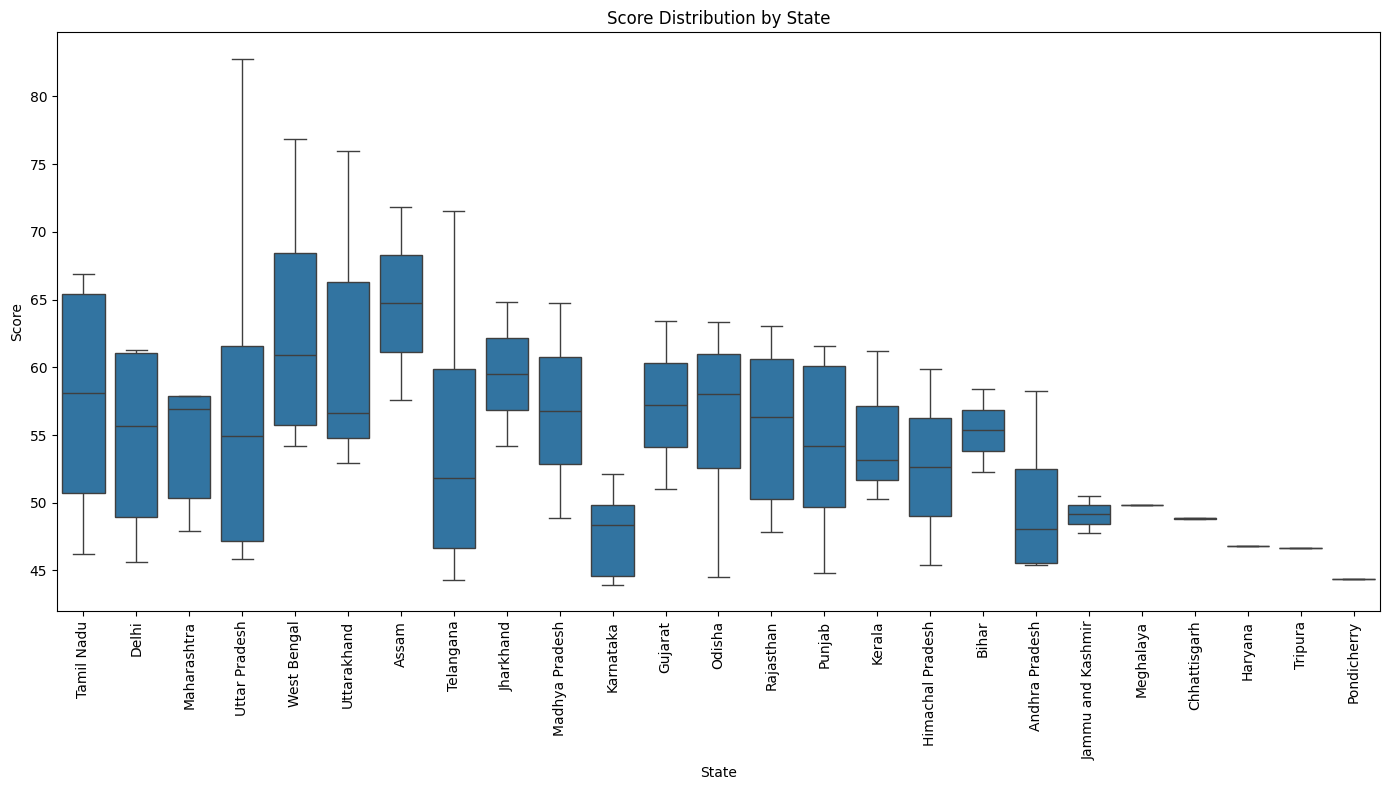

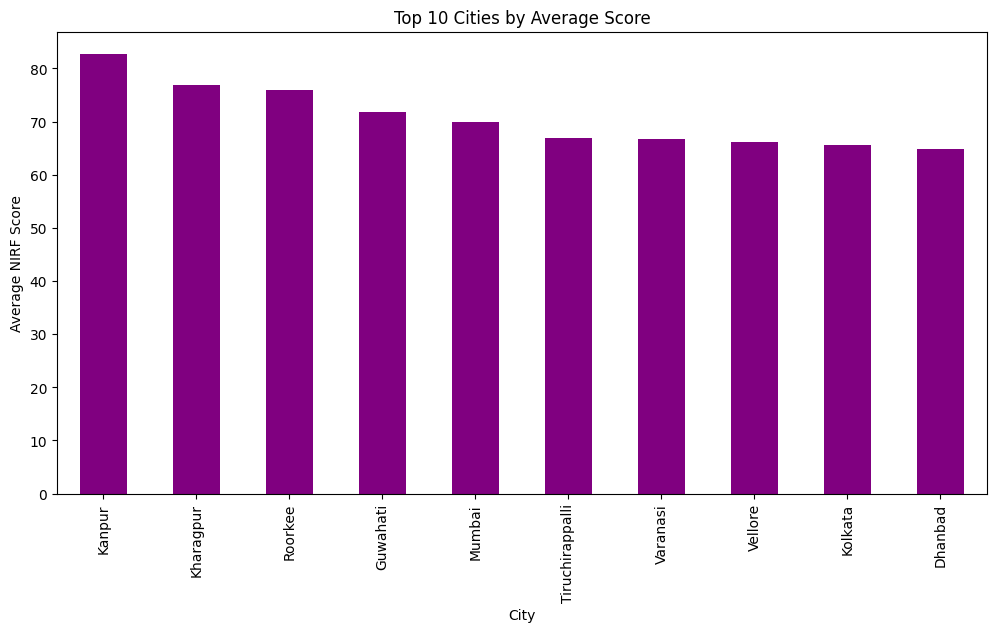

In [84]:
# Jupyter Notebook for Advanced Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/nirf_engineering_2024.csv')

# 1. Score Distribution by State
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='Score', data=df, showfliers=False)
plt.xticks(rotation=90)
plt.title('Score Distribution by State')
plt.tight_layout()
plt.show()

# 2. Correlation Analysis (if additional columns exist)
if 'Teaching Learning Resources' in df.columns:
    numeric_cols = ['Score', 'Teaching Learning Resources', 
                   'Research and Professional Practice', 
                   'Graduation Outcomes', 'Outreach and Inclusivity', 
                   'Perception']
    corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Parameter Correlation Matrix')
    plt.show()

# 3. Top Performing Cities
top_cities = df.groupby('City')['Score'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='purple')
plt.title('Top 10 Cities by Average Score')
plt.ylabel('Average NIRF Score')
plt.show()

# 4. Institution Type Analysis (if data available)
if 'Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Type', y='Score', data=df)
    plt.title('Performance by Institution Type')
    plt.show()

NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location
